In [ ]:
!pip install beautifulsoup4 
!pip install requests 
!pip install plotly 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
url = "https://www.worldometers.info/coronavirus/"

In [ ]:
content = requests.get(url).content

In [ ]:
soup = BeautifulSoup(content, 'html.parser')

In [ ]:
#soup

In [ ]:
tdata = soup.find('tbody').find_all('tr')

In [ ]:
tdata

In [ ]:
tdata[8]

<tr style="">
<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">1</td>
<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>
<td style="font-weight: bold; text-align:right">97,721,719</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="font-weight: bold; text-align:right;">1,080,356 </td>
<td style="font-weight: bold; 
                                    text-align:right;"></td>
<td style="font-weight: bold; text-align:right">94,243,867</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="text-align:right;font-weight:bold;">2,397,496</td>
<td style="font-weight: bold; text-align:right">3,250</td>
<td style="font-weight: bold; text-align:right">291,685</td>
<td style="font-weight: bold; text-align:right">3,225</td>
<td style="font-weight: bold; text-align:right">1,112,261,255</td>
<td style="font-weight: bold; text-align:right">3,319,940</td>
<td style="font-weigh

In [ ]:
whole_data = []
for i in range(8, len(tdata)):
    country_data = []
    block_of_data = tdata[i].find_all('td')
    #print(block_of_data)
    for j in block_of_data:
        #print(j.text)
        country_data.append(j.text)
    whole_data.append(country_data)

In [ ]:
whole_data[8]

['1',
 'USA',
 '97,721,719',
 '',
 '1,080,356 ',
 '',
 '94,243,867',
 '',
 '2,397,496',
 '3,250',
 '291,685',
 '3,225',
 '1,112,261,255',
 '3,319,940',
 '335,024,482 ',
 'North America',
 '3',
 '310',
 '0',
 '',
 '',
 '7,156']

In [ ]:
datapoints = list(map(lambda x: x[1:10] + [x[12], x[14] ] , whole_data ))             #map le row filter gareko

In [ ]:
datapoints[0]

['USA',
 '97,721,719',
 '',
 '1,080,356 ',
 '',
 '94,243,867',
 '',
 '2,397,496',
 '3,250',
 '1,112,261,255',
 '335,024,482 ']

In [ ]:
column_names = ["Name",
                "Total Cases",
                "New Cases",
                "Total Deaths",
                "New Deaths",
                "Total Recovered",
                "New Recovered",
                "Active Cases",
                "Serious Cases",
                "Total Tests",
                "Population"]

In [ ]:
import pandas as pd


In [ ]:
df = pd.DataFrame(datapoints, columns = column_names)

In [ ]:
df.head()

,Name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Cases,Total Tests,Population
0,USA,"97,721,719",,"1,080,356",,"94,243,867",,"2,397,496","3,250","1,112,261,255","335,024,482"
1,India,"44,553,042",,"528,429",,"43,978,271",,"46,342",698,"892,389,008","1,410,088,273"
2,France,"35,011,669",,"154,824",,"34,393,023",,"463,822",869,"271,490,188","65,593,656"
3,Brazil,"34,651,742",,"685,656",,"33,750,459",,"215,627","8,318","63,776,166","215,909,363"
4,Germany,"32,854,286",,"149,275",,"32,071,500","+33,500","633,511","1,406","122,332,384","84,377,788"


In [ ]:
df.to_csv('data.csv', index = False)

In [ ]:
import csv
with open("covid-data.csv","w",newline = "") as csvfile:
    fout = csv.writer(csvfile,delimiter = ",")
    fout.writerow(column_names)
    fout.writerows(datapoints)

## Inspect the missing data

In [ ]:
covid_data = pd.read_csv('/content/data.csv')

In [ ]:
covid_data.tail(2)

,Name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Cases,Total Tests,Population
228,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,
229,China,"248,809",+165,"5,226",NaN,"240,400",+279,"3,183",35,"160,000,000","1,439,323,776"


In [ ]:
covid_data.isna().transpose()                          #transpose= matrix, transform

,0,1,2,3,4,5,6,7,8,9,...,220,221,222,223,224,225,226,227,228,229
Name,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Total Cases,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
New Cases,True,True,True,True,True,False,True,True,False,True,...,True,True,True,True,True,True,True,True,True,False
Total Deaths,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
New Deaths,True,True,True,True,True,False,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
Total Recovered,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
New Recovered,True,True,True,True,False,False,False,True,False,True,...,True,True,True,True,True,True,True,True,True,False
Active Cases,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Serious Cases,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
Total Tests,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,False


In [ ]:
import seaborn as sns    #seabrn is for visual graphics



Text(0.5, 1.0, 'Heat map of missing data')

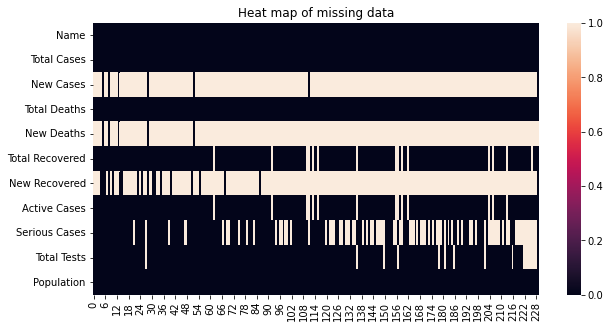

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))            #photo size
sns.heatmap(covid_data.isna().transpose())
plt.title("Heat map of missing data")

# Plot the missing data

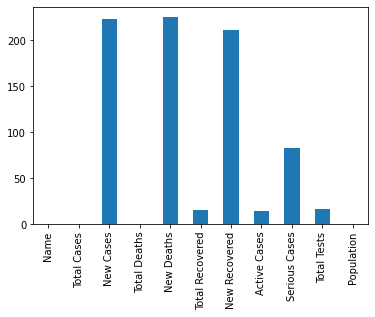

In [ ]:
covid_data.isna().sum().plot.bar() 

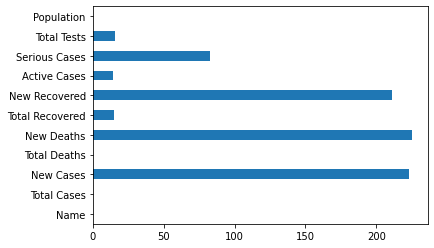

In [ ]:
covid_data.isna().sum().plot.barh() 

## Barplot the Missing data 

### Barplot using pandas

### Barplot using matplotlib

In [ ]:
missing = covid_data.isna().sum()

In [ ]:
missing.index

Index(['Name', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'New Recovered', 'Active Cases', 'Serious Cases',
       'Total Tests', 'Population'],
      dtype='object')

<BarContainer object of 11 artists>

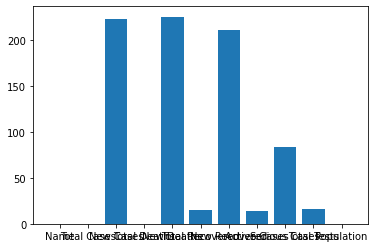

In [ ]:
plt.bar(x = missing.index, height = missing.values)

## Interactive Plot using plotly

In [ ]:
import plotly.express as px
fig = px.bar(x = missing.index, y = missing.values)
fig.show()

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = missing.index
sizes = missing.values

fig = px.pie(values=  missing.values, names= missing.index, title='Missing data In percentage')
fig.show()

# Optional :  Handling Inconsistant data and Data Type conversion in Pandas

In [ ]:
df["Total Cases"]

0      96,347,971
1      44,436,339
2      34,529,201
3      34,472,679
4      32,184,553
          ...    
225            20
226            10
227             9
228             7
229       243,449
Name: Total Cases, Length: 230, dtype: object

It seems like Total Cases is represented in string type. Let's check it. 

In [ ]:
df["Total Cases"].values[:20]

array(['96,347,971', '44,436,339', '34,529,201', '34,472,679',
       '32,184,553', '23,521,792', '23,327,897', '21,867,757',
       '19,578,730', '18,939,344', '16,671,848', '13,342,530',
       '11,411,679', '10,042,745', '9,678,225', '8,386,307', '7,528,961',
       '7,027,252', '6,358,808', '6,299,595'], dtype=object)

In [ ]:
df["Total Cases"].values[0]

'96,347,971'

In [ ]:
type(df["Total Cases"].values[0])

str

Convert this `string` data type to `int` type -- before that replace all `,`  by `""` in the data. 

In [ ]:
df['Total Cases'] =  df['Total Cases'].str.replace(",", "").astype(int)

In [ ]:
type(df["Total Cases"].values[0])

numpy.int64